In [59]:
import pandas as pd 
import numpy as np
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')
df1.columns = ['id','tittle','cast','crew']
df2=df2.merge(df1, on='id')
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                         ...                         runtime  \
0                        ...                           162.0   
1                        ...                           169.0   
2                        ...                           148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 23 columns]

In [2]:
df2['id'] = df2['id'].astype('int')

In [3]:
#DF

In [4]:
c = df2['vote_average'].mean()
c

6.092171559442016

In [5]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [6]:
qm = df2.copy().loc[df2['vote_count'] >= m]
qm.shape

(481, 23)

In [7]:
def moves_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(m+v)*c)

In [8]:
qm['score'] = qm.apply(moves_rating, axis=1)

In [9]:
qm = qm.sort_values('score', ascending=False)
qm [['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

Text(0.5, 1.0, 'Popular Movies')

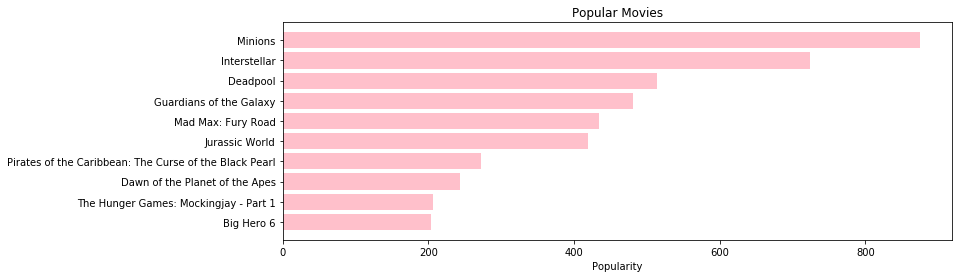

In [16]:
import matplotlib.pyplot as plt
pop= df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='pink')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [11]:
#df = pd.read_csv('links_small.csv')
#df = df[df['tmdbId'].notnull()]['tmdbId'].astype('int')

In [12]:
#sdf = df2[df2['id'].isin(df)]
#sdf.shape

In [13]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Определите объект векторизатора TF-IDF. Удалите все английские стоп-слова, такие как 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Заменить NaN пустой строкой
df2['overview'] = df2['overview'].fillna('')
#Построить требуемую матрицу TF-IDF путем подгонки и преобразования данных
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [18]:
from sklearn.metrics.pairwise import linear_kernel
#Вычислить матрицу сходства косинусов
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [19]:
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [20]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [21]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
    #Получите баллы 10 самых похожих фильмов
    sim_scores = sim_scores[1:11]
    movies_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movies_indices]


In [22]:
get_recommendations('The Cotton Club')

1120             Notting Hill
2368                  Ed Wood
4307     Certifiably Jonathan
4222                  Exotica
2593                 Idlewild
1221                The Doors
4649          Shotgun Stories
4627                  Bizarre
3407    High School Musical 2
4614              3 Backyards
Name: title, dtype: object

In [23]:
#Credits, Genres and Keywords Based Recommender

In [24]:
#Разобрать строковые функции в соответствующие им объекты Python
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [25]:
#Получить имя директора от функции экипажа. 
#Если директора нет в списке, вернуть NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [26]:
#Возвращает список 3 верхних элемента или весь список; 
# смотря что будет больше.
def get_list(x):
    if isinstance(x, list):
        names =[i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [27]:
df2['director'] = df2['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [28]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                               cast        director  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   James Cameron   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]  Gore Verbinski   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]      Sam Mendes   

                              keywords                        genres  
0   [culture clash, future, space war]  [Action, Adventure, Fantasy]  
1   [ocean, drug abuse, exotic island]  [Adventure, Fantasy, Action]  
2  [spy, based on novel, secret agent]    [Action, Adventure, Crime]

In [29]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [30]:
features = ['cast','keywords','director','genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [31]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])
count_matrix.shape

(4803, 11520)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [34]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [35]:
get_recommendations('The Cotton Club', cosine_sim2)

4638    Amidst the Devil's Wings
2227          Battle of the Year
2487                       Duets
938                   Unfaithful
2347                        Fame
2399              Black Nativity
2599                   De-Lovely
3321        Masked and Anonymous
3337               The Godfather
3421                    La Bamba
Name: title, dtype: object

In [36]:
def improved_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movies_indices = [i[0] for i in sim_scores]
    movies = df2.iloc[movies_indices][['title','vote_count','vote_average']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] =  qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['score'] = qualified.apply(moves_rating, axis=1)
    qualified = qualified.sort_values('score', ascending=False).head(4)
    return qualified

In [37]:
improved_recommendations('Memento')

c:\users\maria\envs\labs\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\maria\envs\labs\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\maria\envs\labs\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

title  vote_count  vote_average     score
285   The Other Guys        1383             6  6.052601
515   50 First Dates        2105             6  6.042970
732         Paycheck         581             5  5.829895
1210         Gothika         629             5  5.813751

In [38]:
improved_recommendations('Mean Girls')

c:\users\maria\envs\labs\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\maria\envs\labs\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\maria\envs\labs\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

title  vote_count  vote_average     score
1369          Cape Fear         675             7  6.335978
4551        Now Is Good         371             7  6.244613
2568          The Craft         380             6  6.076383
209   The Bourne Legacy        2651             6  6.037744

In [39]:
#Collaborative Filtering

In [44]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
df3 = pd.read_csv('ratings_small.csv')
df3.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [45]:
df3.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [46]:
features = ['userId','movieId','rating']
df3[features].head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

In [47]:
data = Dataset.load_from_df(df3[['userId','movieId','rating']], reader)
data.split(n_folds=5)

In [48]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

c:\users\maria\envs\labs\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
c:\users\maria\envs\labs\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8928
MAE:  0.6894
------------
Fold 2
RMSE: 0.9000
MAE:  0.6955
------------
Fold 3
RMSE: 0.8948
MAE:  0.6871
------------
Fold 4
RMSE: 0.8968
MAE:  0.6883
------------
Fold 5
RMSE: 0.8906
MAE:  0.6844
------------
------------
Mean RMSE: 0.8950
Mean MAE : 0.6889
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8928356913512269,
                             0.9000369696848711,
                             0.8947979093441021,
                             0.89681654003188,
                             0.8905588641338497],
                            'mae': [0.689373622771786,
                             0.6954909697768562,
                             0.6871254134697271,
                             0.6882990103269441,
                             0.6844344238322561]})

In [49]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [50]:
df3[df3['userId'] == 1]

userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117

In [54]:
svd.predict(1, 551, 3)

Prediction(uid=1, iid=551, r_ui=1, est=2.6132484962028126, details={'was_impossible': False})

In [49]:
#Hybrid Recommender

In [55]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [56]:
ls = pd.read_csv('links_small.csv')[['movieId', 'tmdbId']]
ls.head()

movieId   tmdbId
0        1    862.0
1        2   8844.0
2        3  15602.0
3        4  31357.0
4        5  11862.0

In [57]:
ls['tmdbId'] = ls['tmdbId'].apply(convert_int)
ls.columns = ['movieId', 'id']
ls = ls.merge(df2[['title', 'id']], on='id').set_index('title')
indices_ls = ls.set_index('id')

In [58]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = ls.loc[title]['id']
    movie_id = ls.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim2[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = df2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_ls.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

hybrid(1, 'Avatar')

KeyError: 'the label [381902] is not in the [index]'